# Mathcing Impulse Response Functions to Empirics 

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [30]:
model = BabyMAKROModelClass(name='baseline')           

**Unpack namespaces:**

In [31]:
par = model.par                 
ss = model.ss                   
sol = model.sol                

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

**Find SS:**

In [32]:
model.find_ss()                 

**Jacobian:**

In [33]:
model.compile(do_print=True)

model compiled, 52.0 secs


In [34]:
model.calc_jac(do_print=True)   

Jacobian calculated in 1.9 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

**Set exogenous variables:**

In [35]:
model.set_exo_ss()              

**Define shock:**

In [36]:
Tshock = 25                                                                 # length of shock
persistence = np.array([np.exp(-0.1*np.arange(Tshock)**2)])                           # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 
Priceshock = 0.003                                                          # size of the price shock

model.sol.chi[:Tshock,:] = model.ss.chi*(1 + 2.5*Priceshock*persistence)      # the shock to chi is 2.5 times as large as the price shock 
model.sol.P_F[:Tshock,:] = model.ss.P_F*(1 + Priceshock*persistence)        # shock to the foreign price
model.sol.P_M_C[:Tshock,:] = model.ss.P_M_C*(1 + Priceshock*persistence)    # shock to the consumption import price 
model.sol.P_M_G[:Tshock,:] = model.ss.P_M_G*(1 + Priceshock*persistence)    # shock to the government consumption import price  
model.sol.P_M_I[:Tshock,:] = model.ss.P_M_I*(1 + Priceshock*persistence)    # shock to the investment import price  
model.sol.P_M_X[:Tshock,:] = model.ss.P_M_X*(1 + Priceshock*persistence)    # shock to the export import price  

**Find IRF:**

In [37]:
model.find_IRF()              

initial:
t1-t0 = 0.02319 secs
it = 5
    max. abs. error = 1.46e-11
    5.52e-13 in A_R_ini_error
    5.16e-15 in Aq_diff
    3.77e-15 in FOC_capital_agency
    6.61e-12 in FOC_K_ell
    1.46e-11 in mkt_clearing
    1.24e-12 in PC

solve: t1-t0 = 0.04980 secs
evaluate + update: t3-t2 = 0.05020 secs


## 4. <a id='toc1_'></a>[Data](#toc0_)

**Load data:**

In [38]:
# Load data from Excel file 'IRFs.xlsx'
empirical_IRF_median = pd.read_excel('data/IRFs.xlsx', sheet_name='Median')
empirical_IRF_lower = pd.read_excel('data/IRFs.xlsx', sheet_name='Lower')
empirical_IRF_upper = pd.read_excel('data/IRFs.xlsx', sheet_name='Upper')
empirical_IRF_variance = pd.read_excel('data/IRFs.xlsx', sheet_name='Variance')



**Clean and view data:**

In [39]:
# Give columns names
column_mapping_median = {'Unnamed: 0': 'Variable', 'Unnamed: 1': 'Time', 'Unnamed: 2': 'Shock', 'value': 'Median'}
column_mapping_lower = {'Unnamed: 0': 'Variable', 'Unnamed: 1': 'Time', 'Unnamed: 2': 'Shock', 'value': 'Lower'}
column_mapping_upper = {'Unnamed: 0': 'Variable', 'Unnamed: 1': 'Time', 'Unnamed: 2': 'Shock', 'value': 'Upper'}
column_mapping_variance = {'Unnamed: 0': 'Variable', 'Unnamed: 1': 'Time', 'Unnamed: 2': 'Shock', 'value': 'Variance'}

# Rename columns
empirical_IRF_median.rename(columns=column_mapping_median, inplace=True)
empirical_IRF_lower.rename(columns=column_mapping_lower, inplace=True)
empirical_IRF_upper.rename(columns=column_mapping_upper, inplace=True)
empirical_IRF_variance.rename(columns=column_mapping_variance, inplace=True)

# Join the median, lower and upper values
empirical_IRF = pd.concat([
    empirical_IRF_median,
    empirical_IRF_median['Median'],
    empirical_IRF_lower['Lower'],
    empirical_IRF_upper['Upper']
], axis=1)

empirical_IRF['Time'] = empirical_IRF_median['Time'] - 1

# Display the merged DataFrame
display(empirical_IRF)

#save data
empirical_IRF.to_csv('data/empirical_IRF.csv', index=False)



,Variable,Time,Shock,Median,Median,Lower,Upper
0,log(GDP),0,ForeignDemand,5.397396e-01,5.397396e-01,0.465209,0.614988
1,log(GDP),0,GovSpending,1.601517e-01,1.601517e-01,0.078125,0.241017
2,log(GDP),0,IntRate,-1.708129e-01,-1.708129e-01,-0.292146,-0.024131
3,log(GDP),0,OilPrice,-1.012910e-02,-1.012910e-02,-0.024260,0.003141
4,log(GDP),1,ForeignDemand,2.416250e-01,2.416250e-01,0.121660,0.385166
...,...,...,...,...,...,...,...
1503,POIL,20,OilPrice,-2.516516e-07,-2.516516e-07,-0.000326,0.000283
1504,POIL,21,OilPrice,-3.609448e-07,-3.609448e-07,-0.000246,0.000187
1505,POIL,22,OilPrice,-1.604693e-08,-1.604693e-08,-0.000148,0.000129
1506,POIL,23,OilPrice,1.813119e-06,1.813119e-06,-0.000068,0.000113


**Plot response to shocks:**

Variable types:
['log(GDP)' 'log(C)' 'log(IM)' 'log(IBx)' 'log(Ibol)' 'log(EX)' 'log(G)'
 'MarkovUgap' 'MarkovLSupply' 'log(PC)' 'log(PY)' 'log(W_rel)' 'log(W)'
 'log(Wp)' 'log(PBol)' 'log(PEX)' 'Sentiment' 'RF' 'PF' 'YF' 'POIL']
Shock types:
['ForeignDemand' 'GovSpending' 'IntRate' 'OilPrice' 'LaborSupply']


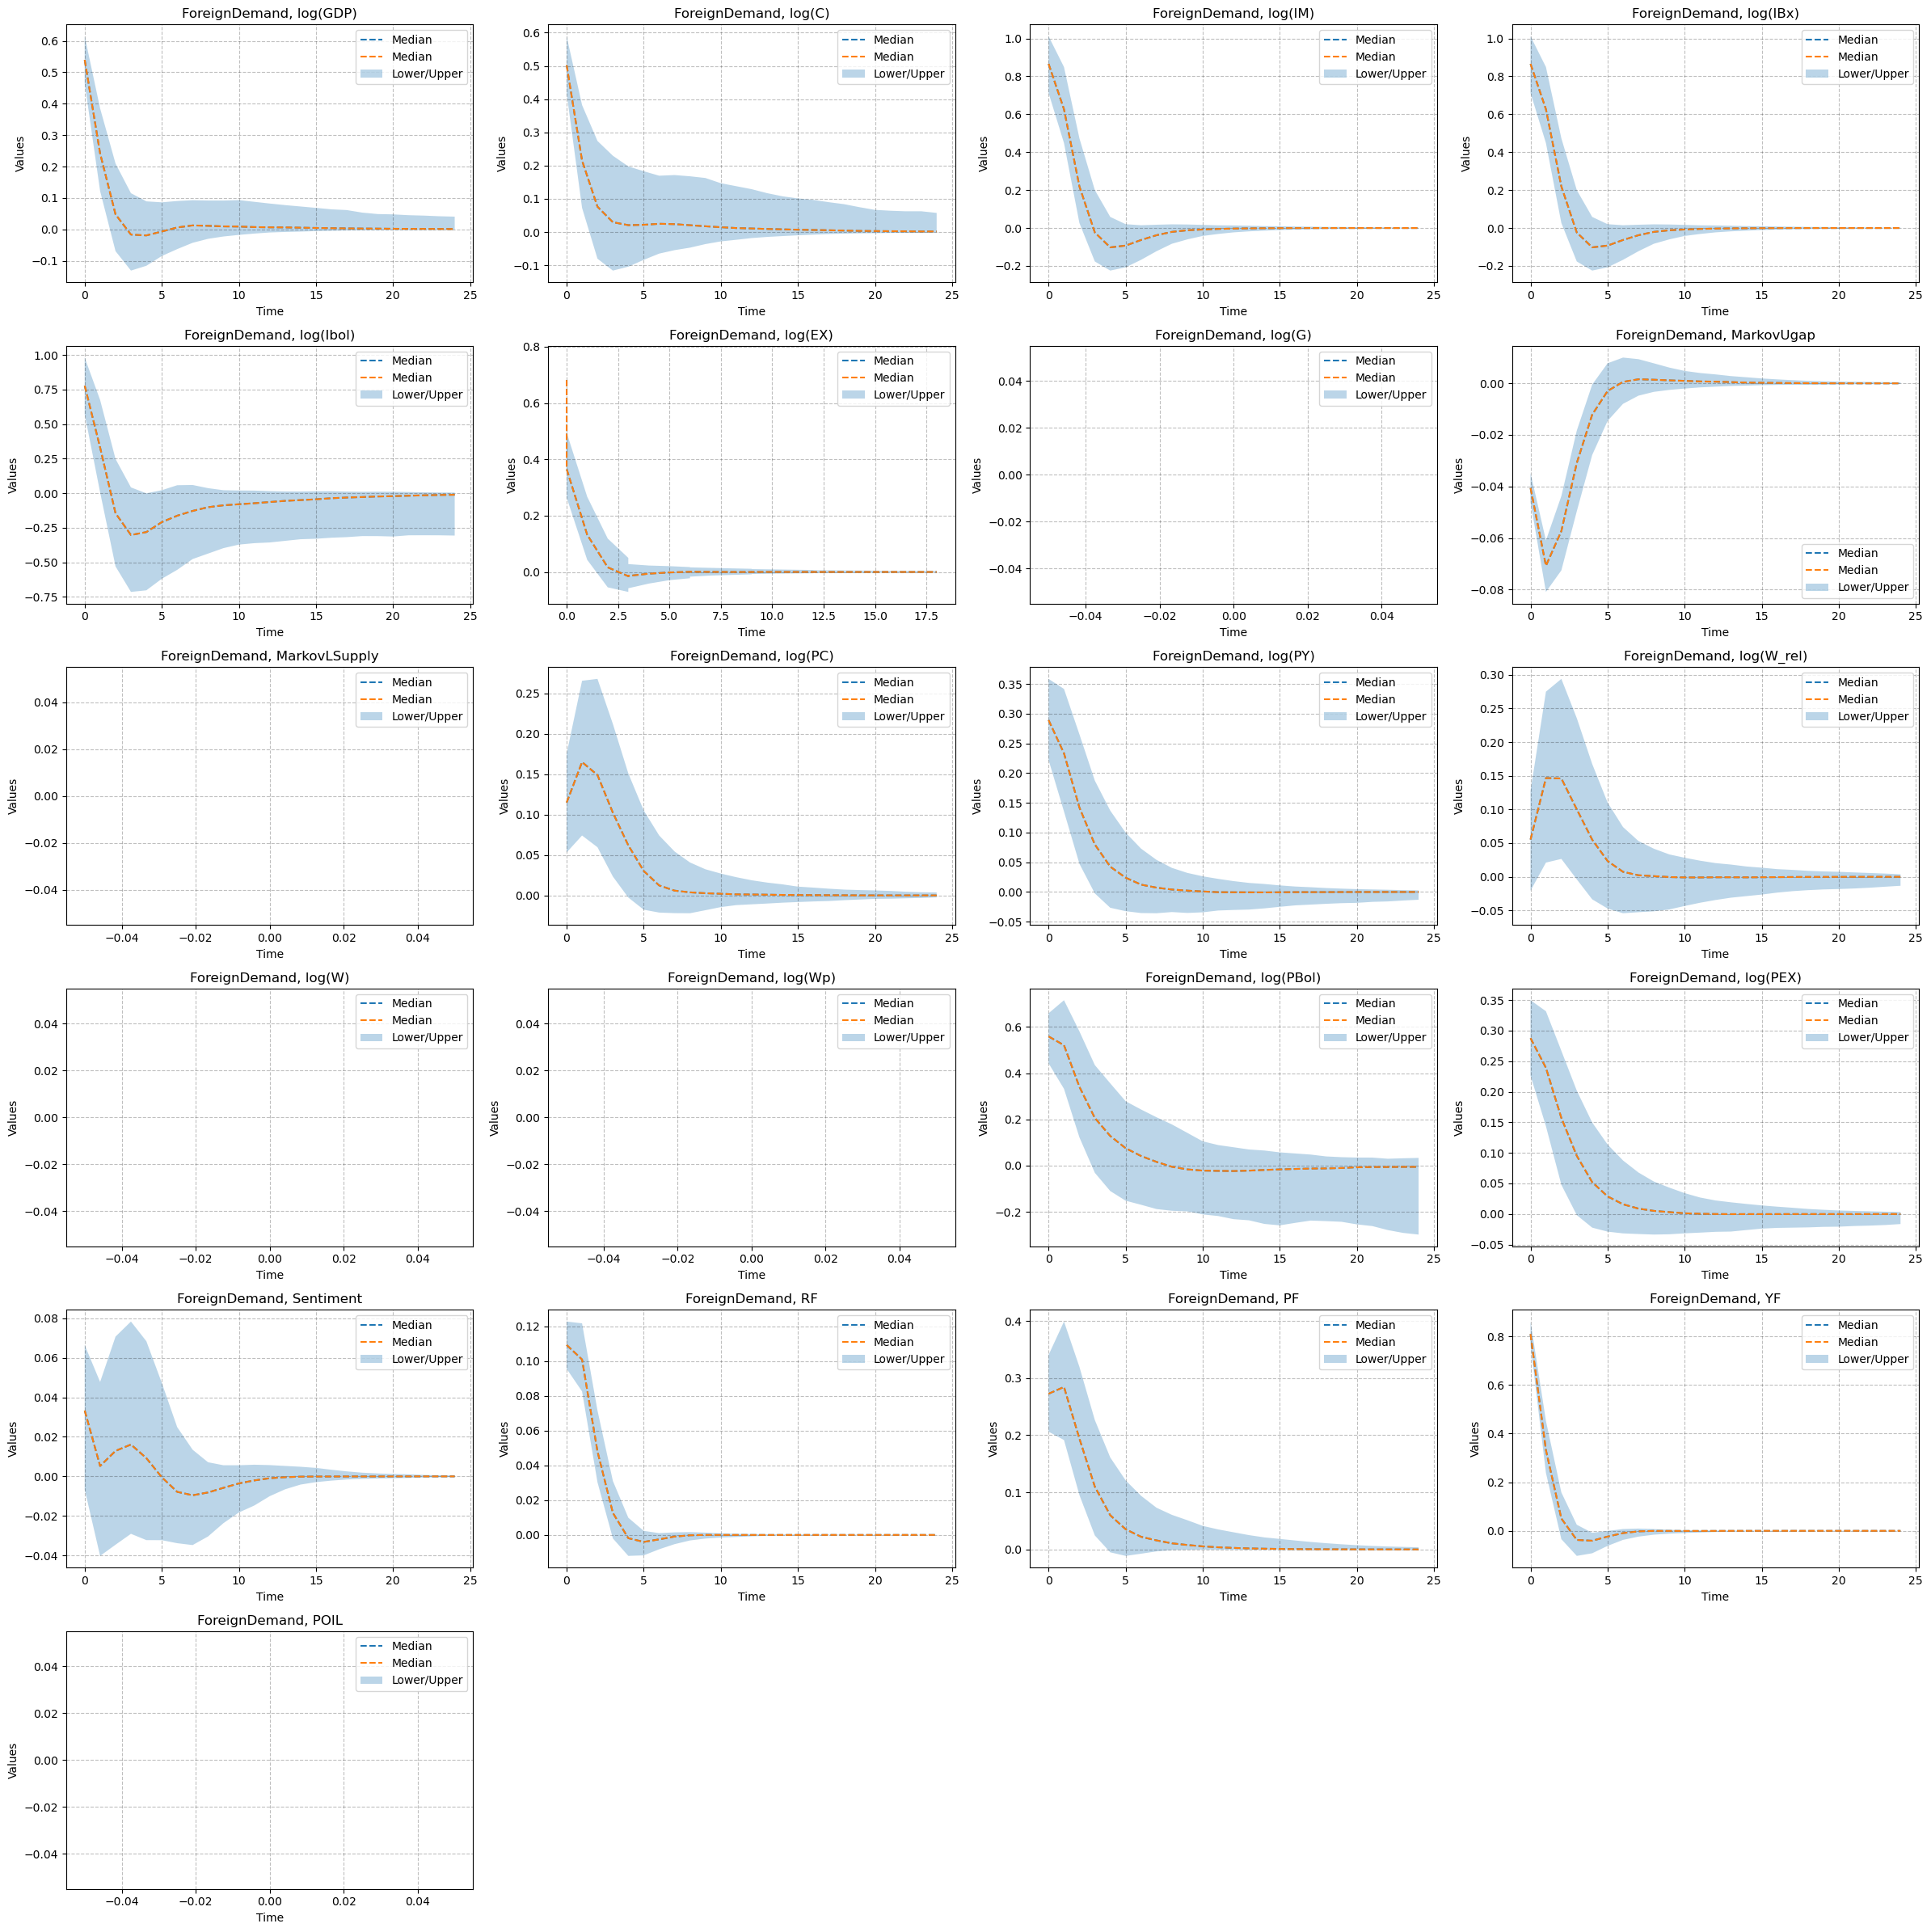

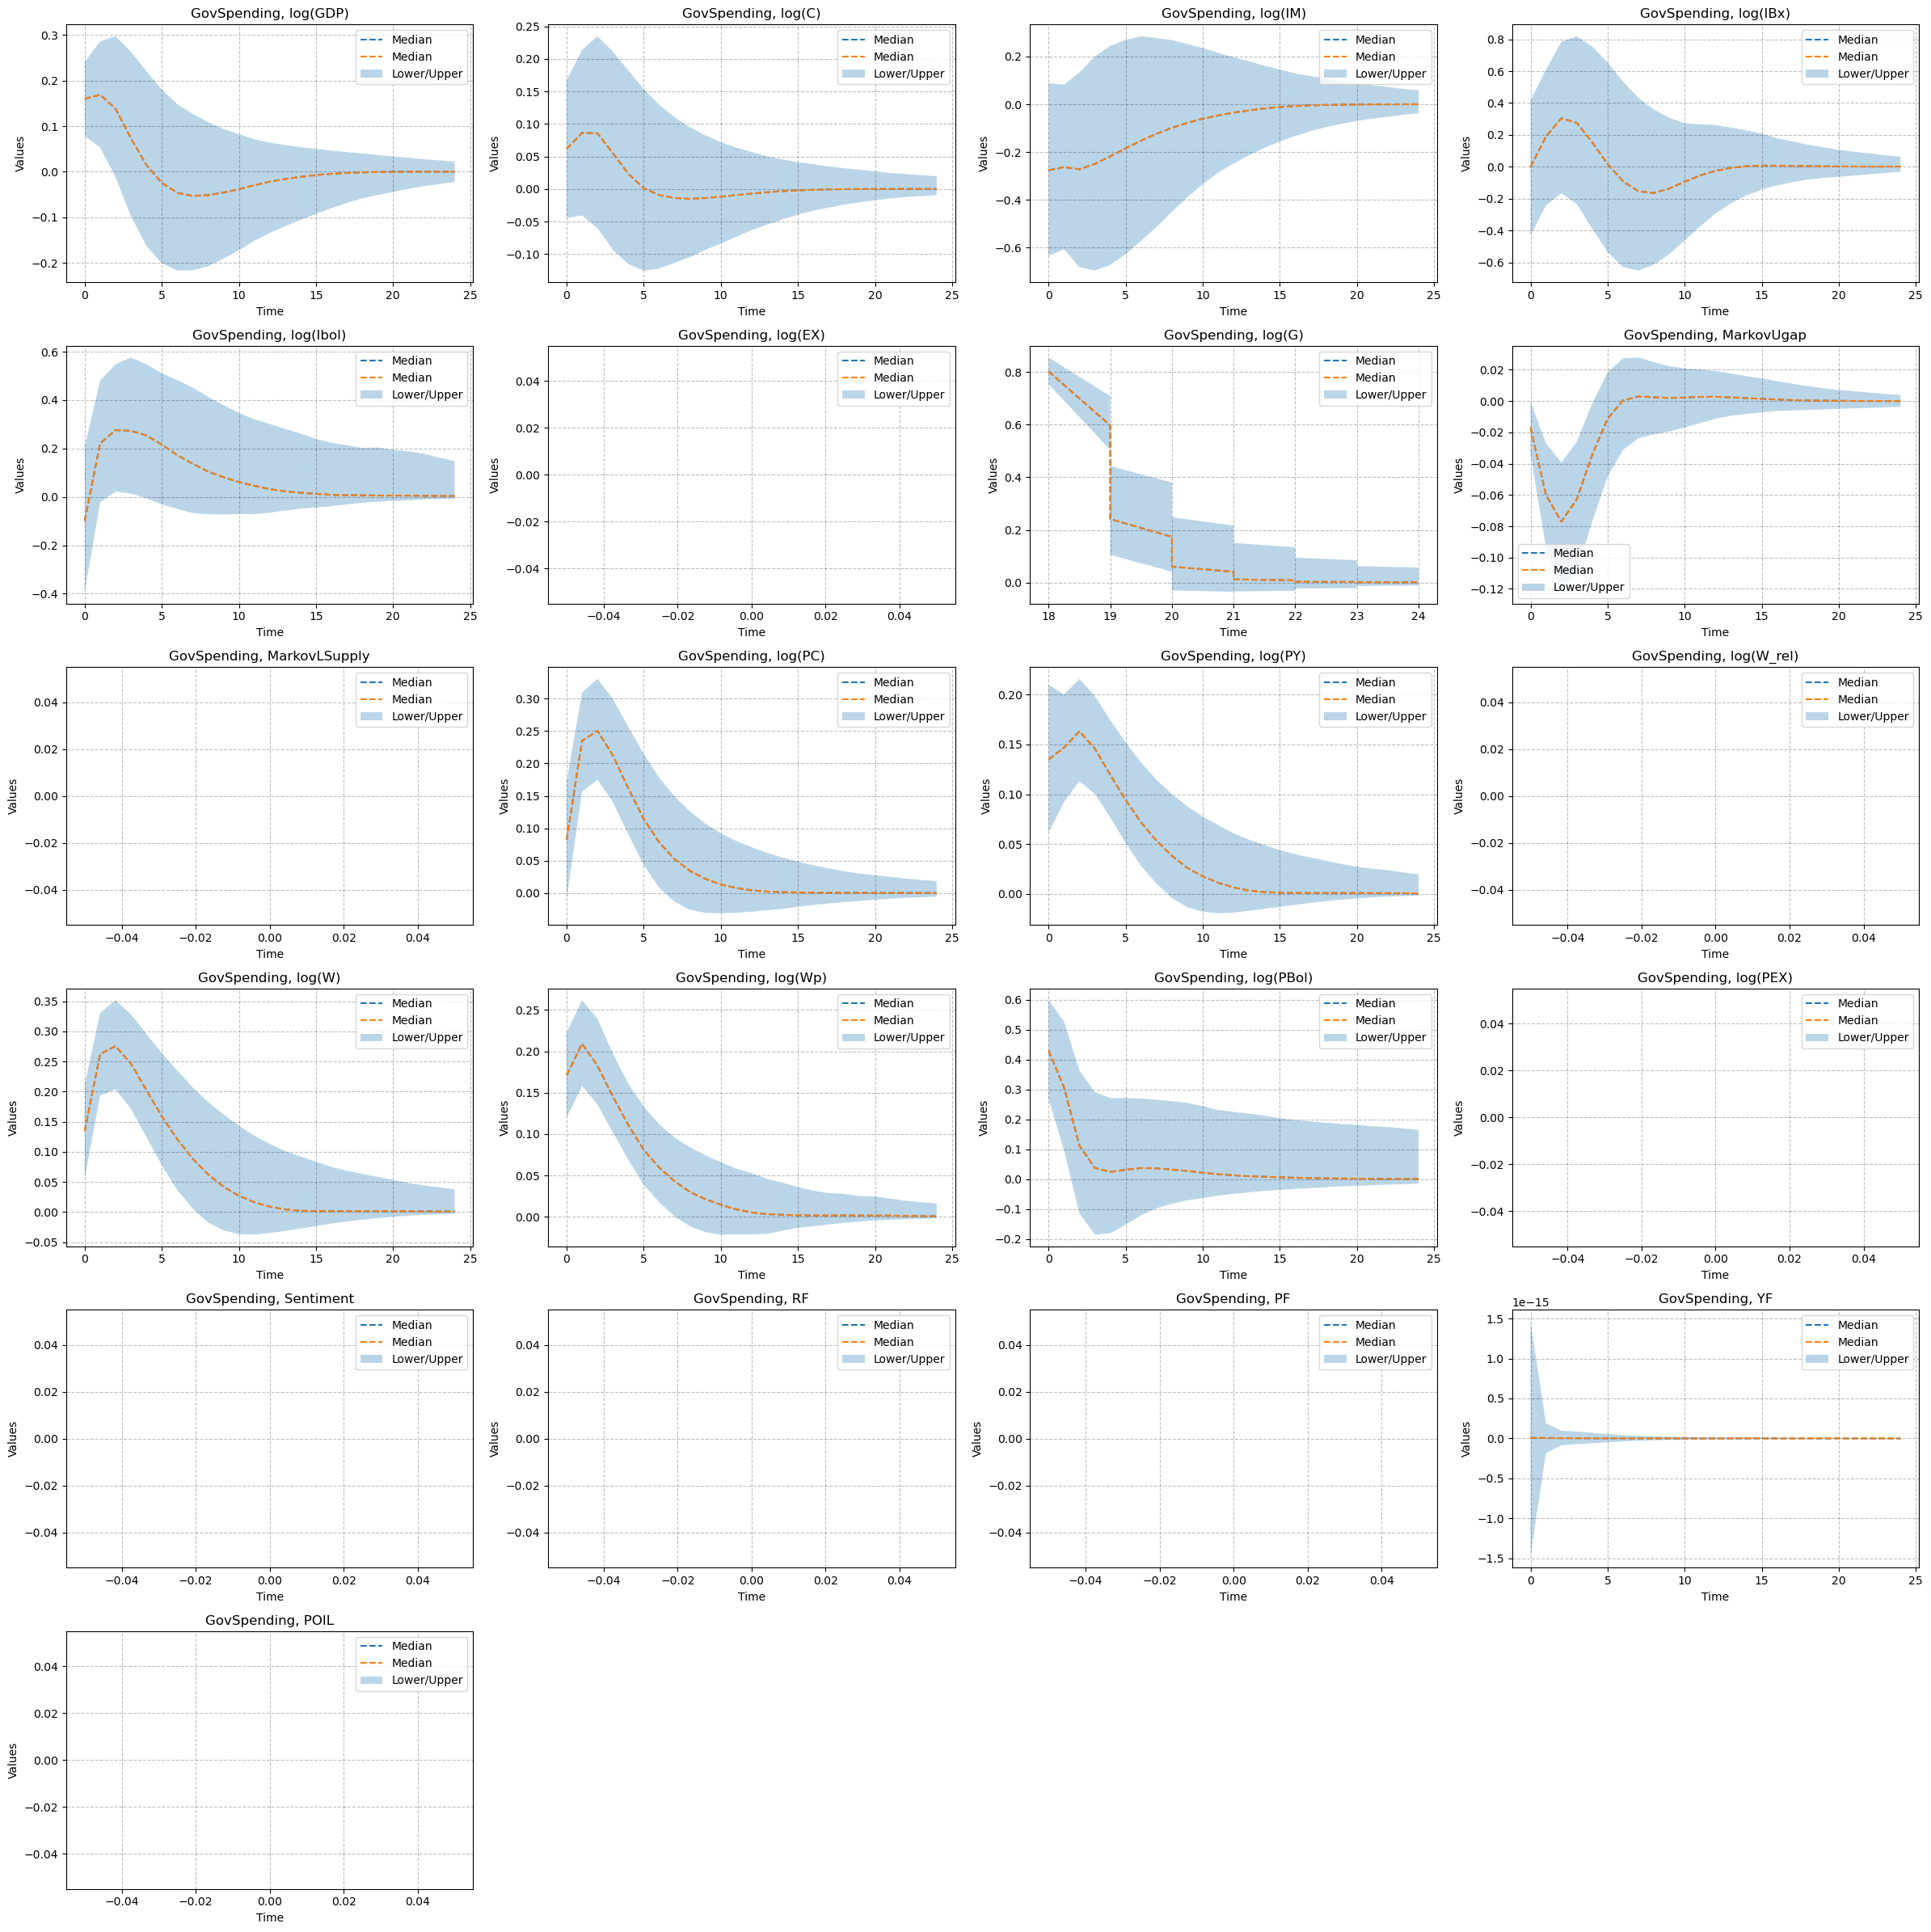

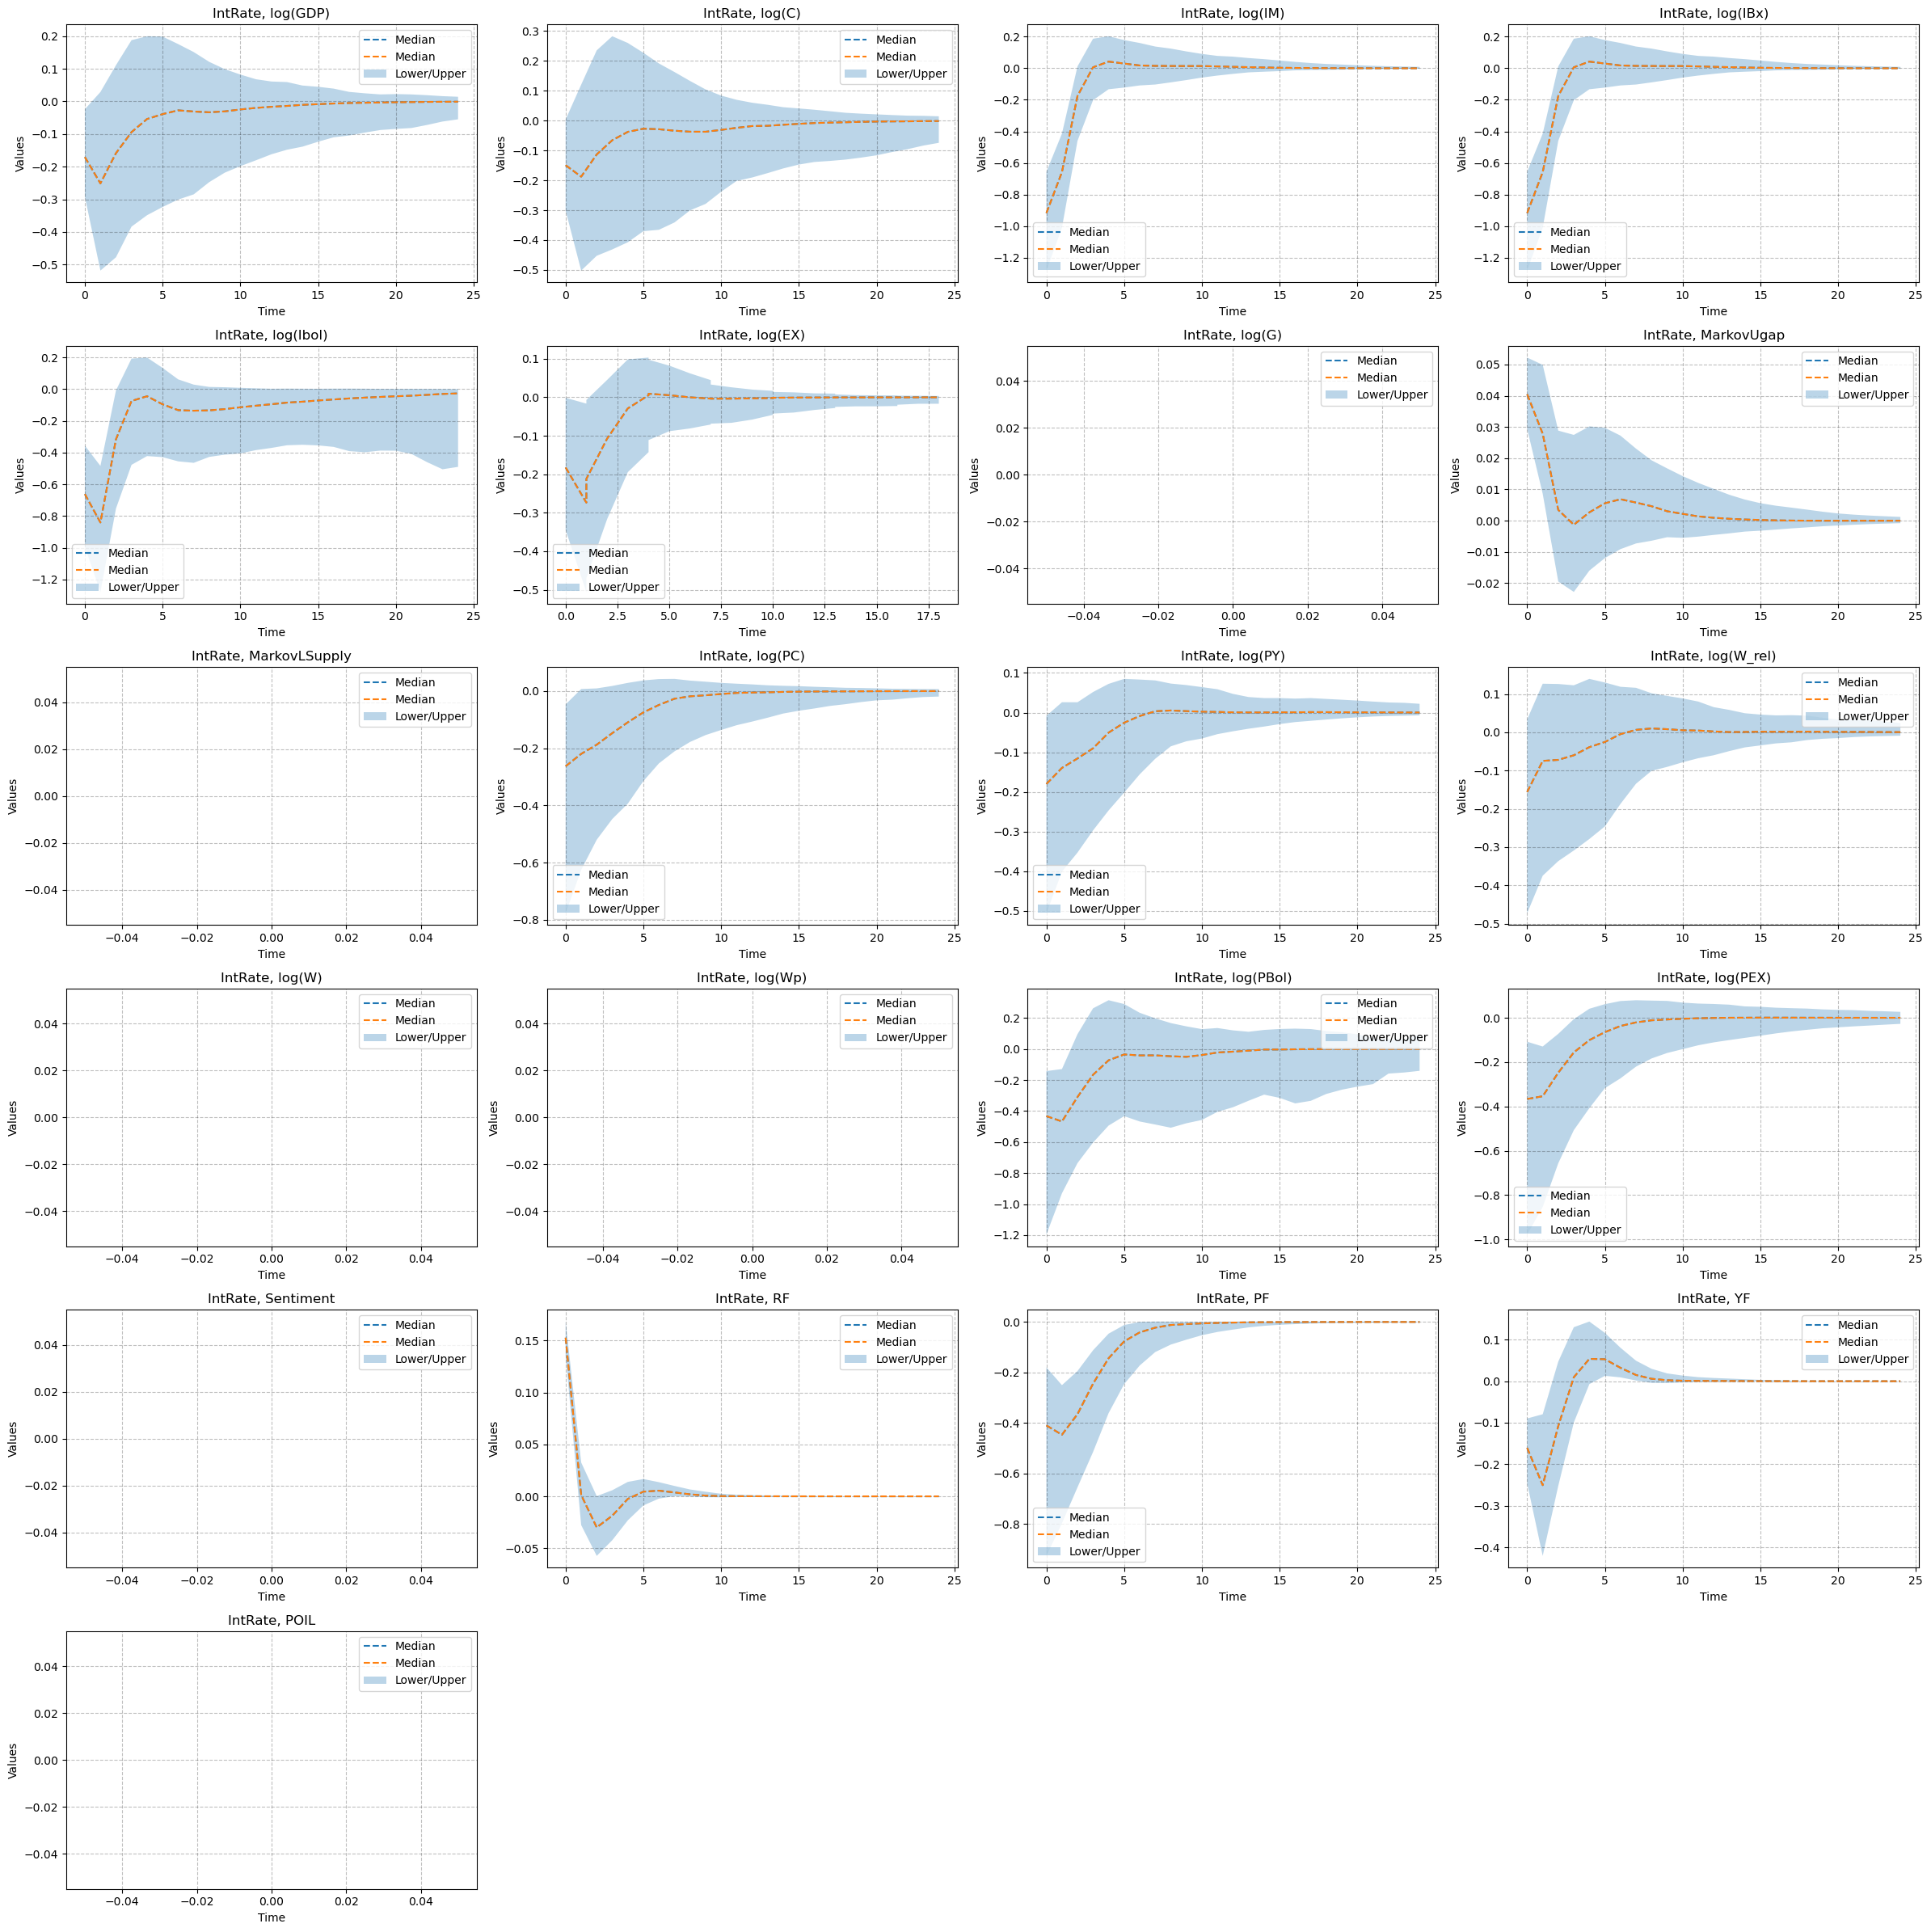

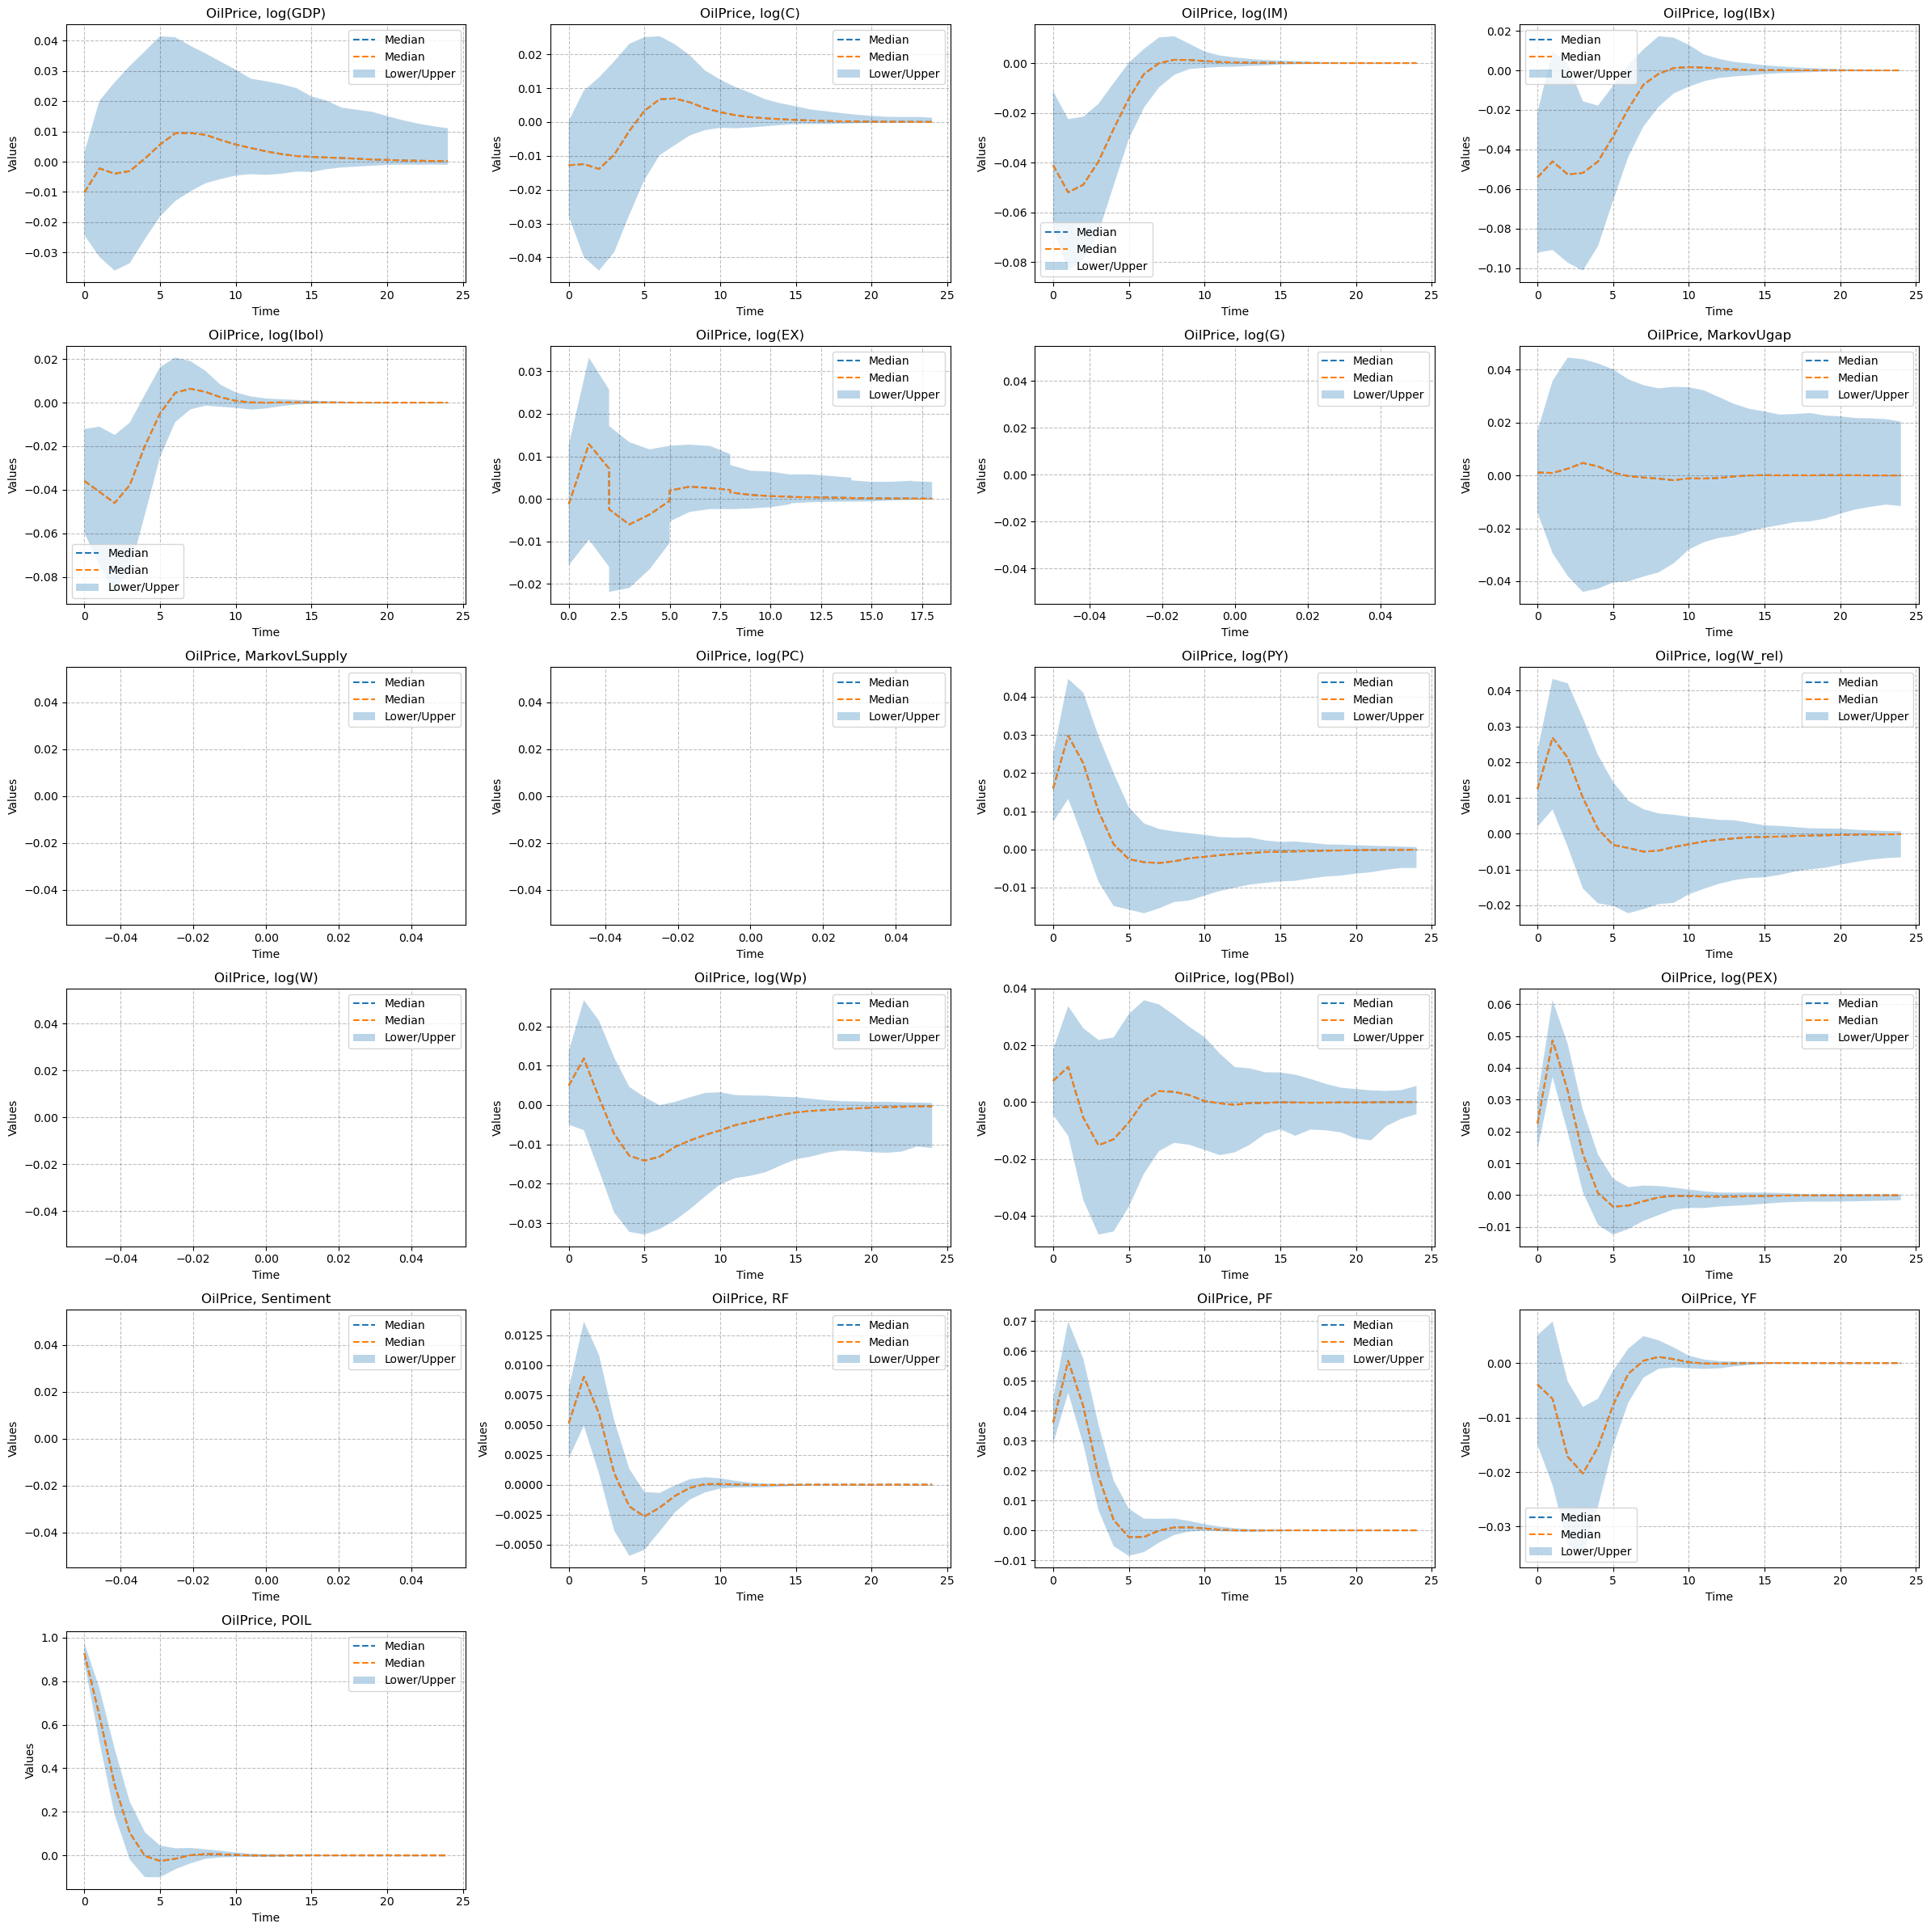

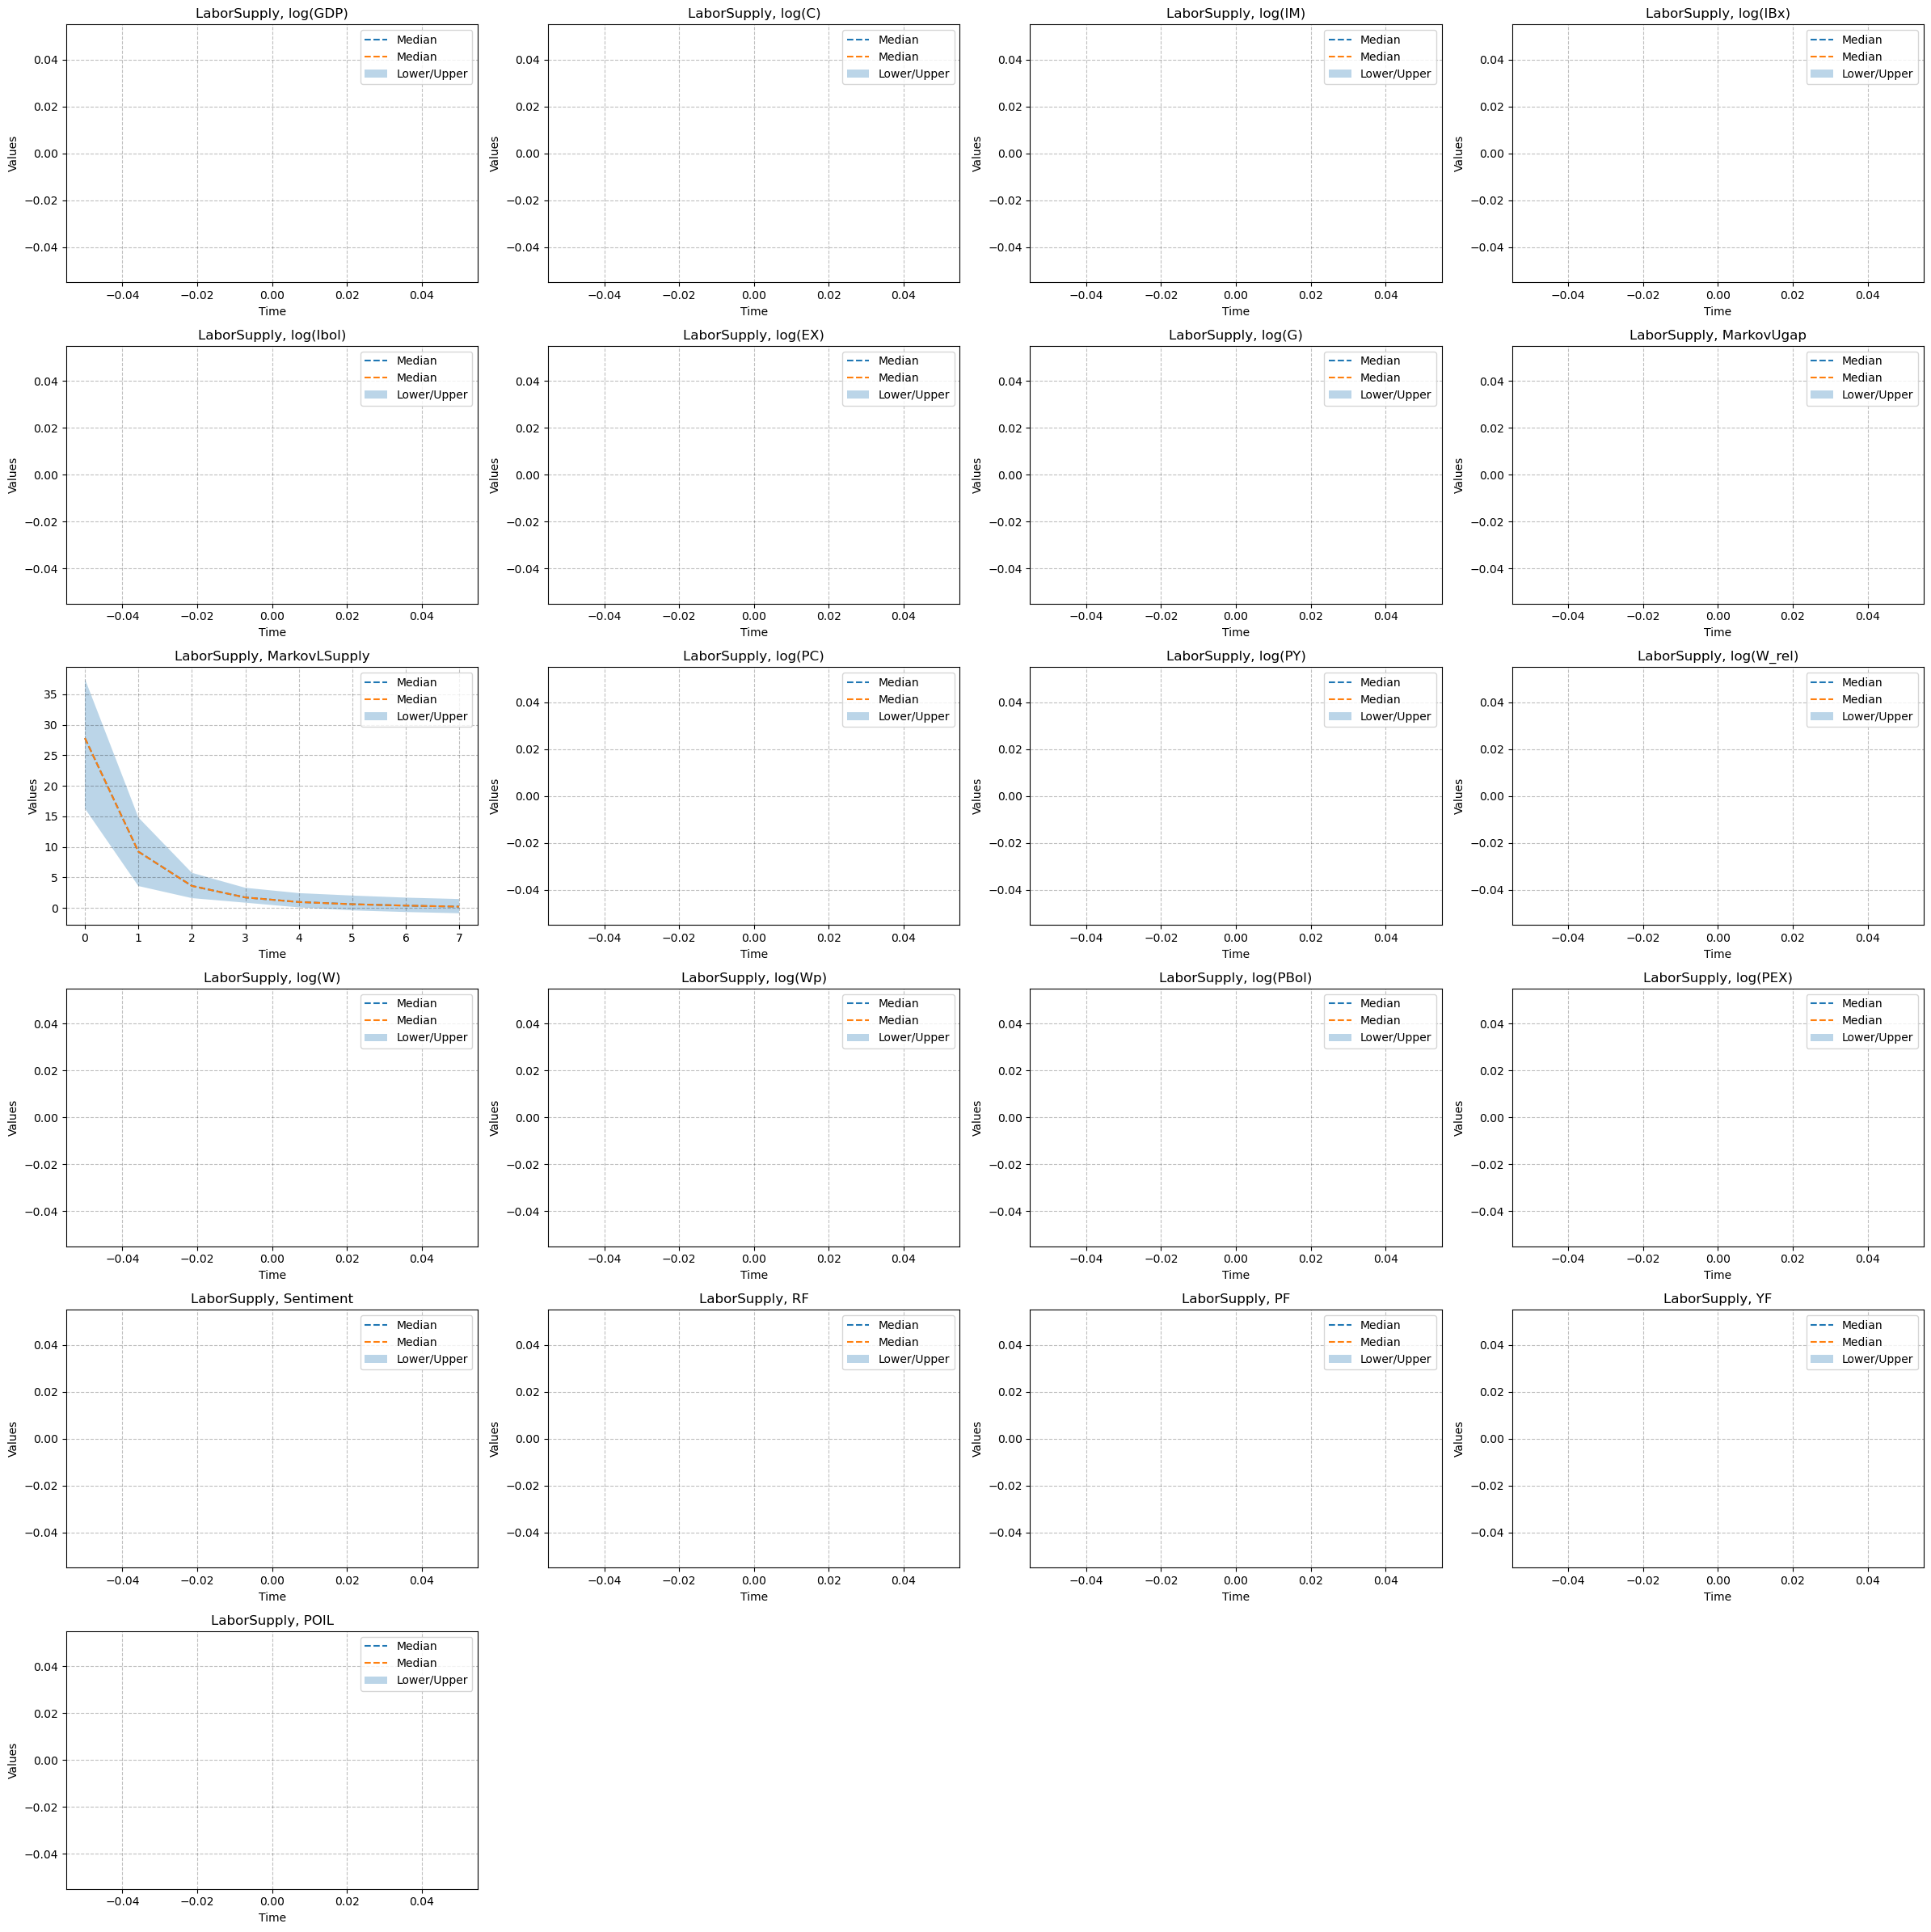

In [40]:
# Show different variables and shocks
variables = empirical_IRF['Variable'].unique()
shocks = empirical_IRF['Shock'].unique()

# Print the variables and shocks
print("Variable types:")
print(variables)
print("Shock types:")
print(shocks)

#Plot
ncol = 4
nrow = int(np.ceil(len(variables) / ncol)) 

# Loop through each shock type
for shock_type in shocks:
    plt.figure(figsize=(ncol * 6, nrow * 4))

    # Loop through each variable and plot the data
    for i, variable_type in enumerate(variables):
        shock_IRF = empirical_IRF[(empirical_IRF['Shock'] == shock_type) & (empirical_IRF['Variable'] == variable_type)]

        ax = plt.subplot(nrow, ncol, i + 1)

        plt.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
        plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')

        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.title(f'{shock_type}, {variable_type}')
        plt.legend()


    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

